In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
user_data = pd.read_csv('/aiffel/aiffel/customer_segmentation/user_data.csv')
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,16953,1,10,30,20.8,20.8,1,0.0,1,0,0.0
1,13703,1,10,318,99.5,99.5,1,0.0,1,0,0.0
2,13829,1,-12,359,-102.0,-102.0,1,0.0,1,1,1.0
3,16257,1,1,176,21.9,21.9,1,0.0,1,0,0.0
4,16765,1,4,294,34.0,34.0,1,0.0,1,0,0.0


In [3]:
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)

In [4]:
z_scores = np.abs(z_scores)
z_scores

,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,0.439709,0.237198,0.611201,0.226713,0.766917,0.704913,0.295648,0.396911,0.271913,0.296906
1,0.439709,0.237198,2.241376,0.217191,0.565706,0.704913,0.295648,0.396911,0.271913,0.296906
2,0.439709,0.241910,2.647472,0.241571,1.080878,0.704913,0.295648,0.396911,0.132456,9.828225
3,0.439709,0.239126,0.834897,0.226580,0.764105,0.704913,0.295648,0.396911,0.271913,0.296906
4,0.439709,0.238483,2.003661,0.225116,0.733169,0.704913,0.295648,0.396911,0.271913,0.296906
...,...,...,...,...,...,...,...,...,...,...
4357,4.405139,12.188656,0.878630,5.924646,2.069667,9.639880,0.277108,6.783151,0.146459,0.296906
4358,1.322054,3.259803,0.868726,6.214540,7.189620,12.381309,0.293882,21.918669,0.271913,0.296906
4359,18.058801,4.604325,0.898440,4.593640,0.217058,14.864996,0.292116,33.768619,18.275929,0.094404
4360,23.344089,4.797746,0.908345,3.378712,0.468758,19.984673,0.289468,19.049273,5.724757,0.195655


In [5]:
threshold = 3
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,outlier
0,16953,1,10,30,20.8,20.8,1,0.0,1,0,0.0,0
1,13703,1,10,318,99.5,99.5,1,0.0,1,0,0.0,0
2,13829,1,-12,359,-102.0,-102.0,1,0.0,1,1,1.0,1
3,16257,1,1,176,21.9,21.9,1,0.0,1,0,0.0,0
4,16765,1,4,294,34.0,34.0,1,0.0,1,0,0.0,0


In [6]:
import matplotlib.pyplot as plt

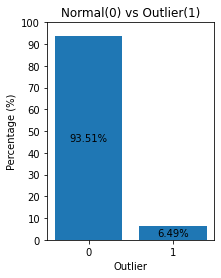

In [7]:
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True)*100

plt.figure(figsize=(3, 4))
bars = plt.bar(['0', '1'], outlier_percentage)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

In [8]:
user_data = user_data[user_data['outlier'] == 0] 

user_data = user_data.drop(columns=['outlier'])

user_data.reset_index(inplace=True, drop=True)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,16953,1,10,30,20.8,20.8,1,0.0,1,0,0.0
1,13703,1,10,318,99.5,99.5,1,0.0,1,0,0.0
2,16257,1,1,176,21.9,21.9,1,0.0,1,0,0.0
3,16765,1,4,294,34.0,34.0,1,0.0,1,0,0.0
4,13017,1,48,7,204.0,204.0,1,0.0,1,0,0.0


In [9]:
len(user_data)

4079

In [10]:
import seaborn as sns 

In [11]:
corr = user_data.drop(columns=['CustomerID']).corr()
corr

,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
purchase_cnt,1.000000,0.731489,-0.376549,0.779654,0.015064,0.584643,0.057103,0.711888,0.580140,0.204802
item_cnt,0.731489,1.000000,-0.309419,0.903631,0.400393,0.555527,-0.027363,0.643151,0.387455,0.041616
recency,-0.376549,-0.309419,1.000000,-0.308514,-0.079233,-0.357570,-0.176967,-0.355817,-0.191481,-0.027870
user_total,0.779654,0.903631,-0.308514,1.000000,0.436031,0.561582,-0.018506,0.660339,0.420096,0.060112
user_average,0.015064,0.400393,-0.079233,0.436031,1.000000,0.258224,-0.142678,0.216465,-0.025880,-0.168062
unique_products,0.584643,0.555527,-0.357570,0.561582,0.258224,1.000000,-0.172724,0.948612,0.351358,-0.043702
average_interval,0.057103,-0.027363,-0.176967,-0.018506,-0.142678,-0.172724,1.000000,-0.149510,-0.017565,0.145035
total_transactions,0.711888,0.643151,-0.355817,0.660339,0.216465,0.948612,-0.149510,1.000000,0.411883,-0.012864
cancel_frequency,0.580140,0.387455,-0.191481,0.420096,-0.025880,0.351358,-0.017565,0.411883,1.000000,0.612509
cancel_rate,0.204802,0.041616,-0.027870,0.060112,-0.168062,-0.043702,0.145035,-0.012864,0.612509,1.000000


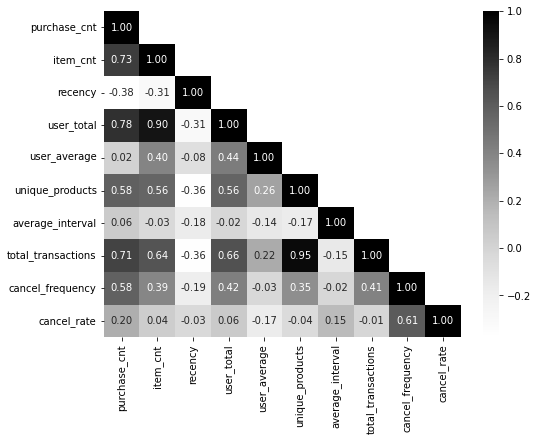

In [12]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
data = user_data.copy()
columns_list = data.iloc[:, 1:].columns
data[columns_list] = scaler.fit_transform(data[columns_list])
data

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,16953,-0.703553,-0.677318,-0.624377,-0.682925,-1.293990,-0.960685,-0.578620,-0.815456,-0.430930,-0.442015
1,13703,-0.703553,-0.677318,2.256250,-0.637980,-0.918502,-0.960685,-0.578620,-0.815456,-0.430930,-0.442015
2,16257,-0.703553,-0.685800,0.835941,-0.682297,-1.288742,-0.960685,-0.578620,-0.815456,-0.430930,-0.442015
3,16765,-0.703553,-0.682972,2.016198,-0.675386,-1.231011,-0.960685,-0.578620,-0.815456,-0.430930,-0.442015
4,13017,-0.703553,-0.641505,-0.854427,-0.578301,-0.419919,-0.960685,-0.578620,-0.815456,-0.430930,-0.442015
...,...,...,...,...,...,...,...,...,...,...,...
4074,13521,-0.252328,-0.012895,-0.914440,-0.083450,0.309268,4.609169,-0.574130,3.899728,-0.430930,-0.442015
4075,13018,5.613602,4.434499,-0.764408,3.458577,-0.196713,4.627078,-0.446146,4.375780,-0.074819,-0.442015
4076,15033,1.552574,0.884312,-0.884434,0.754742,-0.292313,4.644988,-0.434919,4.874502,0.637403,-0.186418
4077,13451,0.424510,1.313124,-0.664386,0.926298,0.863991,4.662897,-0.421447,4.092416,-0.074819,-0.442015


In [15]:
from sklearn.decomposition import PCA

In [16]:
data.set_index('CustomerID', inplace=True)
pca = PCA().fit(data)

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

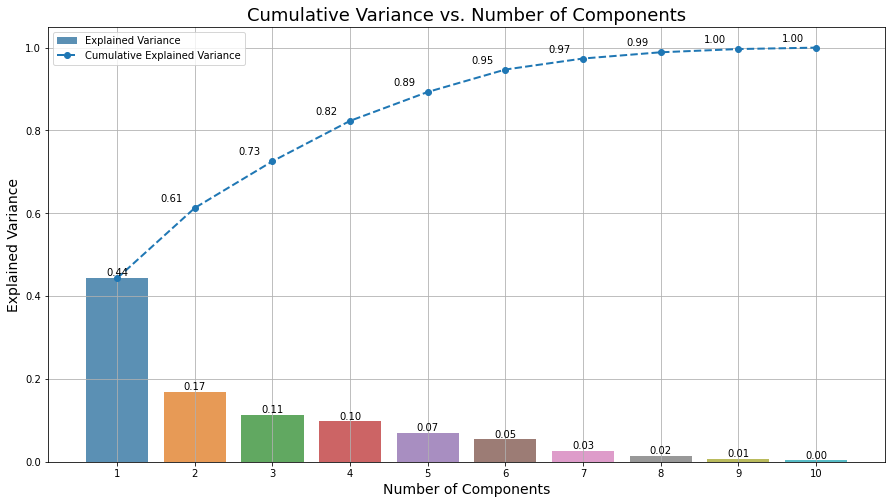

In [19]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [21]:
# 6개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

In [22]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
16953,-1.771427,0.178688,0.201845,-0.941086,-0.235967,1.218874
13703,-2.332341,-0.147350,-1.347636,0.057715,1.507583,-0.013092
16257,-2.098082,0.095546,-0.578817,-0.559428,0.722887,0.637124
16765,-2.346895,0.003917,-1.210749,-0.212869,1.477810,0.156361
13017,-1.522331,-0.195920,0.301634,-0.413518,-0.742634,1.106896


In [25]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels

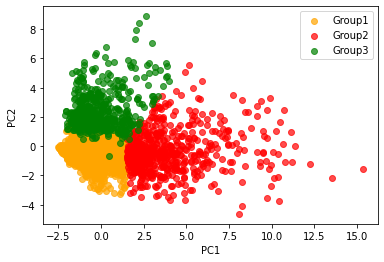

In [26]:
# 각 클러스터 별 데이터 분리 
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

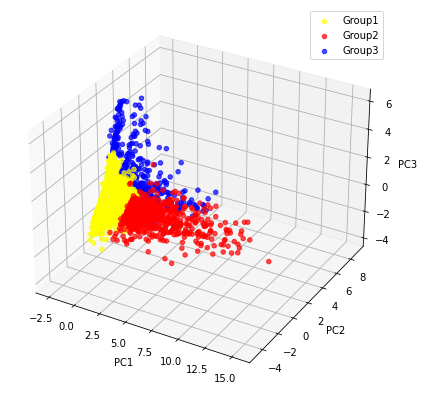

In [40]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터에 대해 3D 산점도 그리기
ax.scatter(cluster_0['PC1'], cluster_0['PC2'], cluster_0['PC3'], 
           color='yellow', alpha=0.7, label='Group1')
ax.scatter(cluster_1['PC1'], cluster_1['PC2'], cluster_1['PC3'], 
           color='red', alpha=0.7, label='Group2')
ax.scatter(cluster_2['PC1'], cluster_2['PC2'], cluster_2['PC3'], 
           color='blue', alpha=0.7, label='Group3')

# 축 라벨 설정
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [33]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,cluster
CustomerID,,,,,,,
16953,-1.771427,0.178688,0.201845,-0.941086,-0.235967,1.218874,0
13703,-2.332341,-0.147350,-1.347636,0.057715,1.507583,-0.013092,0
16257,-2.098082,0.095546,-0.578817,-0.559428,0.722887,0.637124,0
16765,-2.346895,0.003917,-1.210749,-0.212869,1.477810,0.156361,0
13017,-1.522331,-0.195920,0.301634,-0.413518,-0.742634,1.106896,0
...,...,...,...,...,...,...,...
13521,3.378429,-1.992957,-0.357905,-3.345861,-1.127196,-3.001981,1
13018,9.304768,-1.332822,0.310955,-1.855722,2.821560,0.042412,1
15033,5.478527,-0.985222,-0.497773,-3.525136,-0.059562,-2.518176,1


In [43]:
# 색상 지정 
colors = ['yellow', 'red', 'blue']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기 
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

In [29]:
group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

In [30]:
group1.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.000000,2941.0
mean,15340.752125,2.452227,404.590955,108.751105,664.305270,285.269132,38.880653,1.866297,45.009181,0.227474,0.004033,0.0
std,1715.450919,1.890411,393.804190,104.603508,602.305637,194.607529,32.691077,2.815819,40.071181,0.626734,0.011508,0.0
min,12348.000000,1.000000,1.000000,0.000000,3.800000,3.800000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,13841.000000,1.000000,129.000000,25.000000,233.800000,154.500000,14.000000,0.000000,15.000000,0.000000,0.000000,0.0
50%,15361.000000,2.000000,271.000000,65.000000,459.200000,234.200000,29.000000,0.410000,31.000000,0.000000,0.000000,0.0
75%,16812.000000,3.000000,542.000000,177.000000,896.700000,356.450000,55.000000,2.790000,64.000000,0.000000,0.000000,0.0
max,18287.000000,15.000000,2571.000000,373.000000,4391.900000,1487.600000,177.000000,18.330000,232.000000,4.000000,0.090000,0.0


In [31]:
group2.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0
mean,15238.789137,11.289137,2452.333866,26.161342,4091.844569,416.790287,147.905751,1.550559,230.055911,3.691693,0.018307,1.0
std,1736.176931,6.241624,1709.959041,37.722836,2834.823156,263.174259,67.037034,1.307577,114.370101,4.445851,0.022178,0.0
min,12347.000000,2.000000,457.000000,0.000000,885.800000,80.225000,5.000000,0.000000,17.000000,0.000000,0.000000,1.0
25%,13806.750000,7.000000,1387.000000,4.000000,2385.575000,236.661673,101.250000,0.840000,148.000000,0.000000,0.000000,1.0
50%,15136.500000,10.000000,1960.000000,14.000000,3288.300000,343.410152,139.000000,1.290000,206.000000,2.000000,0.010000,1.0
75%,16770.000000,14.000000,3001.500000,32.000000,4850.175000,492.923661,192.000000,1.867500,290.750000,6.000000,0.030000,1.0
max,18283.000000,31.000000,14652.000000,315.000000,25185.800000,1482.250000,317.000000,15.560000,740.000000,23.000000,0.120000,1.0


In [32]:
group3.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.0
mean,15217.279297,4.921875,482.873047,79.656250,873.805273,178.187832,31.140625,7.914336,41.312500,3.820312,0.092227,2.0
std,1689.831775,2.999307,462.572198,89.548066,746.896728,125.461677,24.547724,8.825187,34.102585,4.072116,0.064929,0.0
min,12352.000000,2.000000,-303.000000,0.000000,-95.900000,-31.966667,1.000000,0.000000,2.000000,0.000000,0.000000,2.0
25%,13753.500000,3.000000,150.750000,15.000000,318.850000,102.618750,11.750000,2.017500,15.750000,1.000000,0.050000,2.0
50%,15262.000000,4.000000,329.000000,43.000000,650.250000,149.102778,24.000000,3.970000,30.000000,3.000000,0.080000,2.0
75%,16619.250000,6.000000,659.000000,115.250000,1248.575000,214.017500,44.000000,11.017500,58.000000,5.000000,0.130000,2.0
max,18282.000000,20.000000,2777.000000,366.000000,7092.100000,1144.050000,112.000000,36.500000,164.000000,23.000000,0.310000,2.0
